In [1]:
from PIL import Image

img = Image.open("bild1.jpg")
img = img.resize((round(img.size[0] / 10), round(img.size[1] / 10)), resample=Image.BICUBIC)

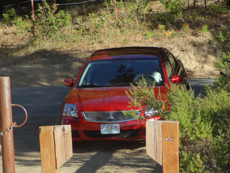

In [2]:
img

In [3]:
import keras.models as models

filename = "cardetector.keras"

model = models.load_model(filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


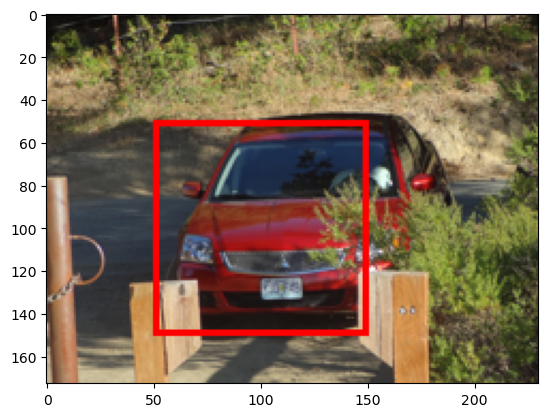

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw

size = 100
step_size = 50

cars = [] # Liste der erkannten Autos

for x in range(0, img.size[0] - size, step_size):
    for y in range(0, img.size[1] - size, step_size):
        part = img.crop((x, y, x + size, y + size))
        data = np.asarray(part.resize((32, 32), resample=Image.BICUBIC))
        data = data.astype(np.float32) / 255.
        
        pred = model.predict(data.reshape(-1, 32, 32, 3))
        #print(pred)
        if pred[0][0] > 0.7:
            cars.append((x, y))
        #plt.imshow(part)
        #plt.show()

out = img.copy()
draw = ImageDraw.Draw(out)

for (x, y) in cars:
    draw.rectangle((x, y, x + size, y + size), outline="red", width=3)

plt.imshow(out)
plt.show()

In [ ]:
img = Image.open("bild3.jpg")
img = img.resize((round(img.size[0] / 5), round(img.size[1] / 5)), resample=Image.BICUBIC)